In [65]:
%matplotlib inline
# Dependencies and Setup
import pandas as pd
import numpy as np
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.tree import export_graphviz
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.widgets import Slider
import seaborn as sns; sns.set()
import ppscore as pps
import seaborn as seabornInstance 


In [2]:
import warnings
warnings.filterwarnings('ignore')

Read all the data to create dataframes for analyses.

In [3]:
L_cap = pd.read_csv("./data/stock_spy.csv")
L_cap = L_cap.loc[L_cap['date']>'2016-01-01']
L_cap = L_cap.loc[:, ["date", "change"]]
L_cap.head(1)

,date,change
4068,2016-01-04,0.002644


In [4]:
L_cap.shape

(1346, 2)

In [5]:
M_cap = pd.read_csv("./data/stock_mdy.csv")
M_cap = M_cap.loc[M_cap['date']>'2016-01-01']
M_cap = M_cap.loc[:, ["date", "change"]]
M_cap.head(1)

,date,change
4068,2016-01-04,0.003601


In [6]:
M_cap.shape

(1346, 2)

In [7]:
S_cap = pd.read_csv("./data/stock_ijr.csv")
S_cap = S_cap.loc[S_cap['date']>'2016-01-01']
S_cap = S_cap.loc[:, ["date", "change"]]
S_cap.head(1)

,date,change
3924,2016-01-04,-0.006651


In [8]:
S_cap.shape

(1346, 2)

In [9]:
trump_econ = pd.read_csv("./data/trump_daydf_count.csv")
trump_econ.sort_values(by=['Date'], inplace=True, ascending=True)
trump_econ.head(1)

,Date,Count
540,2016-01-02,2


In [10]:
trump_econ.shape

(541, 2)

In [11]:
trump_favd = pd.read_csv("./data/trump_favd_count.csv")

trump_favd.head(1)

,day,favorites
0,2016-01-01,68955


In [12]:
trump_favd.shape

(1886, 2)

In [13]:
trump_sentbyday = pd.read_csv("./data/trump_sentbydaydf_count.csv")
trump_sentbyday.sort_values(by=['Date'], inplace=True, ascending=True)
trump_sentbyday.head(1)

,Date,Sent_Count
1801,2016-01-01,2


In [14]:
trump_sentbyday.shape

(1802, 2)

In [15]:
trump_sentbydaypos = pd.read_csv("./data/trump_sentbydayposdf_count.csv")
trump_sentbydaypos.sort_values(by=['Date'], inplace=True, ascending=True)
trump_sentbydaypos.head(1)

,Date,Pos_Count
1714,2016-01-01,5


In [16]:
trump_sentbydaypos.shape

(1715, 2)

In [17]:
trump_sentbydayneg = pd.read_csv("./data/trump_sentbydaynegdf_count.csv")
trump_sentbydayneg.sort_values(by=['Date'], inplace=True, ascending=True)
trump_sentbydayneg.head(1)

,Date,Neg_Count
1628,2016-01-01,3


In [18]:
trump_sentbydayneg.shape

(1629, 2)

Merge all the features and label, % change of large-cap daily prices, dataframes together to form the dataframe, trump_mkt, to be used for analyses.  In additiion, a classified label 'pos_neg' is created to determine whether the stock market prices are up (1) or down (0) each day.  

In [19]:
trump_mkt = L_cap.merge(trump_sentbydayneg, how='inner', left_on="date" ,right_on="Date")
trump_mkt = trump_mkt.merge(trump_sentbydaypos, how='inner' ,on="Date")
trump_mkt = trump_mkt.merge(trump_sentbyday, how='inner' ,on="Date")
trump_mkt = trump_mkt.merge(trump_favd, how='inner' , left_on="date" ,right_on="day")
trump_mkt = trump_mkt.merge(trump_econ, how='inner' ,on="Date")
trump_mkt['pos_neg'] = np.where (trump_mkt['change'] > 0,1,0)
#trump_mkt['pos'] = np.where (trump_mkt['change'] > 0.002,1,0)
#trump_mkt['neg'] = np.where (trump_mkt['change'] < -0.002,1,0)
#trump_mkt['flat'] = np.where ((trump_mkt['change'] <= 0.002) & (trump_mkt['change'] >= -0.002) ,1,0)

trump_mkt

,date,change,Date,Neg_Count,Pos_Count,Sent_Count,day,favorites,Count,pos_neg
0,2016-01-07,-0.006553,2016-01-07,9,5,-4,2016-01-07,58819,1,0
1,2016-01-22,0.003899,2016-01-22,13,9,-4,2016-01-22,107921,1,1
2,2016-02-08,-0.001884,2016-02-08,6,3,-3,2016-02-08,79084,2,0
3,2016-02-24,0.013482,2016-02-24,5,8,3,2016-02-24,154433,1,1
4,2016-02-25,0.009343,2016-02-25,4,5,1,2016-02-25,189031,3,1
...,...,...,...,...,...,...,...,...,...,...
355,2021-02-22,-0.000078,2021-02-22,9,10,1,2021-02-22,33228,1,0
356,2021-03-04,-0.011857,2021-03-04,12,10,-2,2021-03-04,23749,1,0
357,2021-03-29,0.003499,2021-03-29,12,8,-4,2021-03-29,23846,1,1
358,2021-03-31,0.002504,2021-03-31,6,13,7,2021-03-31,12642,5,1


In [20]:
# trump_mkt = L_cap.merge(trump_sentbydayneg, how='inner', left_on="date" ,right_on="Date")
# trump_mkt = trump_mkt.merge(trump_sentbydaypos, how='inner' ,on="Date")
# trump_mkt = trump_mkt.merge(trump_sentbyday, how='inner' ,on="Date")
# trump_mkt = trump_mkt.merge(trump_favd, how='inner' , left_on="date" ,right_on="day")
# trump_mkt = trump_mkt.merge(trump_econ, how='inner' ,on="Date")
# trump_mkt['pos_neg'] = np.where (trump_mkt['change'] > 0,1,0)
# trump_mkt['pos'] = np.where (trump_mkt['change'] > 0.002,1,0)
# trump_mkt['neg'] = np.where (trump_mkt['change'] < -0.002,1,0)
# trump_mkt['flat'] = np.where ((trump_mkt['change'] <= 0.002) & (trump_mkt['change'] >= -0.002) ,1,0)

# trump_mkt

Add the monthly news releases on employment situations and quarterly real GDP estimates.  Since the data are monthly, the missing daily data are filled with the data on the immediate prior values until the new values are announced. 

In [21]:
trump_empsit = pd.read_csv("./Data/empsit.csv")
trump_empsit.head()
trump_mkt['date'] = pd.to_datetime(trump_mkt['date'])

In [22]:
trump_mkt['job_change']=np.nan
for x in range(len(trump_empsit.index)-1):
   trump_mkt.loc[((trump_mkt['date']>= trump_empsit.loc[x][0]) & (trump_mkt['date']< trump_empsit.loc[x+1][0])),['job_change']]=trump_empsit.loc[x][1]
#    print(wsb_mkt.loc[(wsb_mkt['date']>= wsb_empsit.loc[x][0]) & (wsb_mkt['date']< wsb_empsit.loc[x+1][0])]['job_change'])
trump_mkt

,date,change,Date,Neg_Count,Pos_Count,Sent_Count,day,favorites,Count,pos_neg,job_change
0,2016-01-07,-0.006553,2016-01-07,9,5,-4,2016-01-07,58819,1,0,237.0
1,2016-01-22,0.003899,2016-01-22,13,9,-4,2016-01-22,107921,1,1,273.0
2,2016-02-08,-0.001884,2016-02-08,6,3,-3,2016-02-08,79084,2,0,108.0
3,2016-02-24,0.013482,2016-02-24,5,8,3,2016-02-24,154433,1,1,108.0
4,2016-02-25,0.009343,2016-02-25,4,5,1,2016-02-25,189031,3,1,108.0
...,...,...,...,...,...,...,...,...,...,...,...
355,2021-02-22,-0.000078,2021-02-22,9,10,1,2021-02-22,33228,1,0,NaN
356,2021-03-04,-0.011857,2021-03-04,12,10,-2,2021-03-04,23749,1,0,NaN
357,2021-03-29,0.003499,2021-03-29,12,8,-4,2021-03-29,23846,1,1,NaN
358,2021-03-31,0.002504,2021-03-31,6,13,7,2021-03-31,12642,5,1,NaN


In [23]:
trump_rgdp = pd.read_csv("./Data/RGDP.csv")
trump_rgdp.head()
trump_rgdp['Date']=pd.to_datetime(trump_rgdp['Date'])

In [24]:
trump_mkt['growthgap']=np.nan
for x in range(len(trump_rgdp.index)-1):
   trump_mkt.loc[((trump_mkt['date']>= trump_rgdp.loc[x][0]) & (trump_mkt['date']< trump_rgdp.loc[x+1][0])),['growthgap']]=trump_rgdp.loc[x][3]
trump_mkt

,date,change,Date,Neg_Count,Pos_Count,Sent_Count,day,favorites,Count,pos_neg,job_change,growthgap
0,2016-01-07,-0.006553,2016-01-07,9,5,-4,2016-01-07,58819,1,0,237.0,-0.5
1,2016-01-22,0.003899,2016-01-22,13,9,-4,2016-01-22,107921,1,1,273.0,-0.5
2,2016-02-08,-0.001884,2016-02-08,6,3,-3,2016-02-08,79084,2,0,108.0,-0.1
3,2016-02-24,0.013482,2016-02-24,5,8,3,2016-02-24,154433,1,1,108.0,-0.1
4,2016-02-25,0.009343,2016-02-25,4,5,1,2016-02-25,189031,3,1,108.0,-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...
355,2021-02-22,-0.000078,2021-02-22,9,10,1,2021-02-22,33228,1,0,NaN,0.1
356,2021-03-04,-0.011857,2021-03-04,12,10,-2,2021-03-04,23749,1,0,NaN,NaN
357,2021-03-29,0.003499,2021-03-29,12,8,-4,2021-03-29,23846,1,1,NaN,NaN
358,2021-03-31,0.002504,2021-03-31,6,13,7,2021-03-31,12642,5,1,NaN,NaN


In [96]:
trump_mkt_hm1.index[-1]

354

Calculate Predictive Power Score

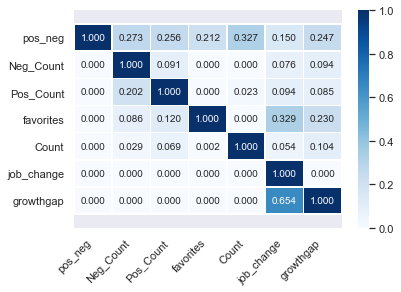

In [27]:
#pps matrix plot
trump_mkt_hm1 = trump_mkt.loc[:, [

"pos_neg",
"Neg_Count",
"Pos_Count",
#"Sent_Count",
"favorites",
"Count",
"job_change",
"growthgap"]]

ax = sns.heatmap(pps.matrix(trump_mkt_hm1), vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True, fmt=".3f")
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
;

# Save Figure
plt.savefig("LCap_PPS_Matrix.png", figsize=(400,240))

# Show plot
plt.show()

Given the low predictive power above, we may work on improving the predictive power by adding 15 lags of features and the % change of stock prices label to the dataframe based on the rationality that responses to remarks may take more that one day.

In [28]:
trump_mkt['negcount1day'] = trump_mkt['Neg_Count'].shift(1)
trump_mkt['poscount1day'] = trump_mkt['Pos_Count'].shift(1)
trump_mkt['sentcount1day'] = trump_mkt['Sent_Count'].shift(1)
trump_mkt['favcount1day'] = trump_mkt['favorites'].shift(1)
trump_mkt['econcount1day'] = trump_mkt['Count'].shift(1)
trump_mkt['job_change1day'] = trump_mkt['job_change'].shift(1)
trump_mkt['growthgap1day'] = trump_mkt['growthgap'].shift(1)
trump_mkt['change1day'] = trump_mkt['change'].shift(1)
trump_mkt['negcount2day'] = trump_mkt['Neg_Count'].shift(2)
trump_mkt['poscount2day'] = trump_mkt['Pos_Count'].shift(2)
trump_mkt['sentcount2day'] = trump_mkt['Sent_Count'].shift(2)
trump_mkt['favcount2day'] = trump_mkt['favorites'].shift(2)
trump_mkt['econcount2day'] = trump_mkt['Count'].shift(2)
trump_mkt['job_change2day'] = trump_mkt['job_change'].shift(2)
trump_mkt['growthgap2day'] = trump_mkt['growthgap'].shift(2)
trump_mkt['change2day'] = trump_mkt['change'].shift(2)
trump_mkt['negcount3day'] = trump_mkt['Neg_Count'].shift(3)
trump_mkt['poscount3day'] = trump_mkt['Pos_Count'].shift(3)
trump_mkt['sentcount3day'] = trump_mkt['Sent_Count'].shift(3)
trump_mkt['favcount3day'] = trump_mkt['favorites'].shift(3)
trump_mkt['econcount3day'] = trump_mkt['Count'].shift(3)
trump_mkt['job_change3day'] = trump_mkt['job_change'].shift(3)
trump_mkt['growthgap3day'] = trump_mkt['growthgap'].shift(3)
trump_mkt['change3day'] = trump_mkt['change'].shift(3)
trump_mkt['negcount4day'] = trump_mkt['Neg_Count'].shift(4)
trump_mkt['poscount4day'] = trump_mkt['Pos_Count'].shift(4)
trump_mkt['sentcount4day'] = trump_mkt['Sent_Count'].shift(4)
trump_mkt['favcount4day'] = trump_mkt['favorites'].shift(4)
trump_mkt['econcount4day'] = trump_mkt['Count'].shift(4)
trump_mkt['job_change4day'] = trump_mkt['job_change'].shift(4)
trump_mkt['growthgap4day'] = trump_mkt['growthgap'].shift(4)
trump_mkt['change4day'] = trump_mkt['change'].shift(4)
trump_mkt['negcount5day'] = trump_mkt['Neg_Count'].shift(5)
trump_mkt['poscount5day'] = trump_mkt['Pos_Count'].shift(5)
trump_mkt['sentcount5day'] = trump_mkt['Sent_Count'].shift(5)
trump_mkt['favcount5day'] = trump_mkt['favorites'].shift(5)
trump_mkt['econcount5day'] = trump_mkt['Count'].shift(5)
trump_mkt['change5day'] = trump_mkt['change'].shift(5)
trump_mkt['negcount6day'] = trump_mkt['Neg_Count'].shift(6)
trump_mkt['poscount6day'] = trump_mkt['Pos_Count'].shift(6)
trump_mkt['sentcount6day'] = trump_mkt['Sent_Count'].shift(6)
trump_mkt['favcount6day'] = trump_mkt['favorites'].shift(6)
trump_mkt['econcount6day'] = trump_mkt['Count'].shift(6)
trump_mkt['job_change6day'] = trump_mkt['job_change'].shift(6)
trump_mkt['growthgap6day'] = trump_mkt['growthgap'].shift(6)
trump_mkt['change6day'] = trump_mkt['change'].shift(6)
trump_mkt['negcount7day'] = trump_mkt['Neg_Count'].shift(7)
trump_mkt['poscount7day'] = trump_mkt['Pos_Count'].shift(7)
trump_mkt['sentcount7day'] = trump_mkt['Sent_Count'].shift(7)
trump_mkt['favcount7day'] = trump_mkt['favorites'].shift(7)
trump_mkt['econcount7day'] = trump_mkt['Count'].shift(7)
trump_mkt['job_change7day'] = trump_mkt['job_change'].shift(7)
trump_mkt['growthgap7day'] = trump_mkt['growthgap'].shift(7)
trump_mkt['change7day'] = trump_mkt['change'].shift(7)
trump_mkt['negcount8day'] = trump_mkt['Neg_Count'].shift(8)
trump_mkt['poscount8day'] = trump_mkt['Pos_Count'].shift(8)
trump_mkt['sentcount8day'] = trump_mkt['Sent_Count'].shift(8)
trump_mkt['favcount8day'] = trump_mkt['favorites'].shift(8)
trump_mkt['econcount8day'] = trump_mkt['Count'].shift(8)
trump_mkt['job_change8day'] = trump_mkt['job_change'].shift(8)
trump_mkt['growthgap8day'] = trump_mkt['growthgap'].shift(8)
trump_mkt['change8day'] = trump_mkt['change'].shift(8)
trump_mkt['negcount9day'] = trump_mkt['Neg_Count'].shift(9)
trump_mkt['poscount9day'] = trump_mkt['Pos_Count'].shift(9)
trump_mkt['sentcount9day'] = trump_mkt['Sent_Count'].shift(9)
trump_mkt['favcount9day'] = trump_mkt['favorites'].shift(9)
trump_mkt['econcount9day'] = trump_mkt['Count'].shift(9)
trump_mkt['job_change9day'] = trump_mkt['job_change'].shift(9)
trump_mkt['growthgap9day'] = trump_mkt['growthgap'].shift(9)
trump_mkt['change9day'] = trump_mkt['change'].shift(9)
trump_mkt['negcount10day'] = trump_mkt['Neg_Count'].shift(10)
trump_mkt['poscount10day'] = trump_mkt['Pos_Count'].shift(10)
trump_mkt['sentcount10day'] = trump_mkt['Sent_Count'].shift(10)
trump_mkt['favcount10day'] = trump_mkt['favorites'].shift(10)
trump_mkt['econcount10day'] = trump_mkt['Count'].shift(10)
trump_mkt['job_change10day'] = trump_mkt['job_change'].shift(10)
trump_mkt['growthgap10day'] = trump_mkt['growthgap'].shift(10)
trump_mkt['change10day'] = trump_mkt['change'].shift(10)
trump_mkt['negcount11day'] = trump_mkt['Neg_Count'].shift(11)
trump_mkt['poscount11day'] = trump_mkt['Pos_Count'].shift(11)
trump_mkt['sentcount11day'] = trump_mkt['Sent_Count'].shift(11)
trump_mkt['favcount11day'] = trump_mkt['favorites'].shift(11)
trump_mkt['econcount11day'] = trump_mkt['Count'].shift(11)
trump_mkt['job_change11day'] = trump_mkt['job_change'].shift(11)
trump_mkt['growthgap11day'] = trump_mkt['growthgap'].shift(11)
trump_mkt['change11day'] = trump_mkt['change'].shift(11)
trump_mkt['negcount12day'] = trump_mkt['Neg_Count'].shift(12)
trump_mkt['poscount12day'] = trump_mkt['Pos_Count'].shift(12)
trump_mkt['sentcount12day'] = trump_mkt['Sent_Count'].shift(12)
trump_mkt['favcount12day'] = trump_mkt['favorites'].shift(12)
trump_mkt['econcount12day'] = trump_mkt['Count'].shift(12)
trump_mkt['job_change12day'] = trump_mkt['job_change'].shift(12)
trump_mkt['growthgap12day'] = trump_mkt['growthgap'].shift(12)
trump_mkt['change12day'] = trump_mkt['change'].shift(12)
trump_mkt['negcount13day'] = trump_mkt['Neg_Count'].shift(13)
trump_mkt['poscount13day'] = trump_mkt['Pos_Count'].shift(13)
trump_mkt['sentcount13day'] = trump_mkt['Sent_Count'].shift(13)
trump_mkt['favcount13day'] = trump_mkt['favorites'].shift(13)
trump_mkt['econcount13day'] = trump_mkt['Count'].shift(13)
trump_mkt['job_change13day'] = trump_mkt['job_change'].shift(13)
trump_mkt['growthgap13day'] = trump_mkt['growthgap'].shift(13)
trump_mkt['change13day'] = trump_mkt['change'].shift(13)
trump_mkt['negcount14day'] = trump_mkt['Neg_Count'].shift(14)
trump_mkt['poscount14day'] = trump_mkt['Pos_Count'].shift(14)
trump_mkt['sentcount14day'] = trump_mkt['Sent_Count'].shift(14)
trump_mkt['favcount14day'] = trump_mkt['favorites'].shift(14)
trump_mkt['econcount14day'] = trump_mkt['Count'].shift(14)
trump_mkt['job_change14day'] = trump_mkt['job_change'].shift(14)
trump_mkt['growthgap14day'] = trump_mkt['growthgap'].shift(14)
trump_mkt['change14day'] = trump_mkt['change'].shift(14)
trump_mkt['negcount15day'] = trump_mkt['Neg_Count'].shift(15)
trump_mkt['poscount15day'] = trump_mkt['Pos_Count'].shift(15)
trump_mkt['sentcount15day'] = trump_mkt['Sent_Count'].shift(15)
trump_mkt['favcount15day'] = trump_mkt['favorites'].shift(15)
trump_mkt['econcount15day'] = trump_mkt['Count'].shift(15)
trump_mkt['job_change15day'] = trump_mkt['job_change'].shift(15)
trump_mkt['growthgap15day'] = trump_mkt['growthgap'].shift(15)
trump_mkt['change15day'] = trump_mkt['change'].shift(15)
trump_mkt

,date,change,Date,Neg_Count,Pos_Count,Sent_Count,day,favorites,Count,pos_neg,...,growthgap14day,change14day,negcount15day,poscount15day,sentcount15day,favcount15day,econcount15day,job_change15day,growthgap15day,change15day
0,2016-01-07,-0.006553,2016-01-07,9,5,-4,2016-01-07,58819,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-22,0.003899,2016-01-22,13,9,-4,2016-01-22,107921,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-02-08,-0.001884,2016-02-08,6,3,-3,2016-02-08,79084,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-02-24,0.013482,2016-02-24,5,8,3,2016-02-24,154433,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-02-25,0.009343,2016-02-25,4,5,1,2016-02-25,189031,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,2021-02-22,-0.000078,2021-02-22,9,10,1,2021-02-22,33228,1,0,...,0.3,0.002911,37.0,24.0,-13.0,1451823.0,1.0,1583.0,0.3,0.019065
356,2021-03-04,-0.011857,2021-03-04,12,10,-2,2021-03-04,23749,1,0,...,0.3,-0.004791,9.0,5.0,-4.0,1340349.0,1.0,1583.0,0.3,0.002911
357,2021-03-29,0.003499,2021-03-29,12,8,-4,2021-03-29,23846,1,1,...,0.0,-0.014651,7.0,9.0,2.0,1532338.0,1.0,1583.0,0.3,-0.004791
358,2021-03-31,0.002504,2021-03-31,6,13,7,2021-03-31,12642,5,1,...,0.0,-0.006103,10.0,17.0,7.0,3201250.0,1.0,716.0,0.0,-0.014651


In [29]:
trump_mkt.to_csv('./Data/trump_lmkt.csv', index=False)

In [30]:
for x in trump_mkt.columns:
    print(x)

date
change
Date
Neg_Count
Pos_Count
Sent_Count
day
favorites
Count
pos_neg
job_change
growthgap
negcount1day
poscount1day
sentcount1day
favcount1day
econcount1day
job_change1day
growthgap1day
change1day
negcount2day
poscount2day
sentcount2day
favcount2day
econcount2day
job_change2day
growthgap2day
change2day
negcount3day
poscount3day
sentcount3day
favcount3day
econcount3day
job_change3day
growthgap3day
change3day
negcount4day
poscount4day
sentcount4day
favcount4day
econcount4day
job_change4day
growthgap4day
change4day
negcount5day
poscount5day
sentcount5day
favcount5day
econcount5day
change5day
negcount6day
poscount6day
sentcount6day
favcount6day
econcount6day
job_change6day
growthgap6day
change6day
negcount7day
poscount7day
sentcount7day
favcount7day
econcount7day
job_change7day
growthgap7day
change7day
negcount8day
poscount8day
sentcount8day
favcount8day
econcount8day
job_change8day
growthgap8day
change8day
negcount9day
poscount9day
sentcount9day
favcount9day
econcount9day
job_chang

In [31]:
# trump_mkt_hm = trump_mkt.loc[:, [

# "pos_neg",
# "Neg_Count",
# "Pos_Count",
# "Sent_Count",
# "favorites",
# "Count",
# "job_change",
# "growthgap",
# "negcount1day",
# "poscount1day",
# "favcount1day",
# "econcount1day",
# "job_change1day",
# "growthgap1day",
# "change1day"#,
# "negcount2day",
# "poscount2day",
# "favcount2day",
# "econcount2day",
# "job_change2day",
# "growthgap2day",
# "change2day",
# "negcount3day",
# "poscount3day",
# "favcount3day",
# "econcount3day",
# "job_change3day",
# "growthgap3day",
# "change3day",
# "negcount4day",
# "poscount4day",
# "favcount4day",
# "econcount4day",
# "job_change4day",
# "growthgap4day",
# "change4day",
# "negcount5day",
# "poscount5day",
# "favcount5day",
# "econcount5day",
# "change5day",
# "negcount6day",
# "poscount6day",
# "favcount6day",
# "econcount6day",
# "job_change6day",
# "growthgap6day",
# "change6day",
# "negcount7day",
# "poscount7day",
# "favcount7day",
# "econcount7day",
# "job_change7day",
# "growthgap7day",
# "change7day",
# "negcount8day",
# "poscount8day",
# "favcount8day",
# "econcount8day",
# "job_change8day",
# "growthgap8day",
# "change8day",
# "negcount9day",
# "poscount9day",
# "favcount9day",
# "econcount9day",
# "job_change9day",
# "growthgap9day",
# "change9day",
# "negcount10day",
# "poscount10day",
# "favcount10day",
# "econcount10day",
# "job_change10day",
# "growthgap10day",
# "change10day",
# "negcount11day",
# "poscount11day",
# "favcount11day",
# "econcount11day",
# "job_change11day",
# "growthgap11day",
# "change11day",
# "negcount12day",
# "poscount12day",
# "favcount12day",
# "econcount12day",
# "job_change12day",
# "growthgap12day",
# "change12day",
# "negcount13day",
# "poscount13day",
# "favcount13day",
# "econcount13day",
# "job_change13day",
# "growthgap13day",
# "change13day",
# "negcount14day",
# "poscount14day",
# "favcount14day",
# "econcount14day",
# "job_change14day",
# "growthgap14day",
# "change14day",
# "negcount15day",
# "poscount15day",
# "favcount15day",
# "econcount15day",
# "job_change15day",
# "growthgap15day",
# "change15day"
#]]

In [32]:
#Correlation Matrix plots

# trump_mkt_hm1 = trump_mkt.loc[:, [

# "pos_neg",
# "Neg_Count",
# "Pos_Count",
# #"Sent_Count",
# "favorites",
# "Count",
# "job_change",
# "growthgap"]]

# corr = trump_mkt_hm1.corr()
# ax = sns.heatmap(
#     corr, 
#     vmin=-1, vmax=1, center=0,
#     cmap=sns.diverging_palette(20, 220, n=200),
#     linewidths=0.5,
#     annot=True, 
#     fmt=".3f"
# )
# ax.set_xticklabels(
#     ax.get_xticklabels(),
#     rotation=45,
#     horizontalalignment='right',    
# )
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5, top - 0.5)
# ;

# plt.figure(figsize=(200,200))
# # Show plot
# plt.show()

# # Save Figure
# plt.savefig("LCap_Correlation_Matrix.png", figsize=(400,240))

In [33]:
#Correlation Matrix plots

# corr = trump_mkt_hm.corr()
# ax = sns.heatmap(
#     corr, 
#     vmin=-1, vmax=1, center=0,
#     cmap=sns.diverging_palette(20, 220, n=200),
#     square=True
# )
# ax.set_xticklabels(
#     ax.get_xticklabels(),
#     rotation=45,
#     horizontalalignment='right'
# );

# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5, top - 0.5)
# ;
# plt.figure(figsize=(200,200))
# # Show plot
# plt.show()

# # Save Figure
# plt.savefig("LCap_Correlation_Matrix.png", figsize=(400,240))

In [34]:
# #pps matrix plot
# trump_mkt_hm1 = trump_mkt.loc[:, [

# "pos_neg",
# "Neg_Count",
# "Pos_Count",
# #"Sent_Count",
# "favorites",
# "Count",
# "job_change",
# "growthgap"]]

# ax = sns.heatmap(pps.matrix(trump_mkt_hm1), vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True, fmt=".3f")
# ax.set_xticklabels(
#     ax.get_xticklabels(),
#     rotation=45,
#     horizontalalignment='right'
# )
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5, top - 0.5)
# ;

# # Save Figure
# plt.savefig("LCap_PPS_Matrix.png", figsize=(400,240))

# # Show plot
# plt.show()

In [35]:
trump_mkt.dropna(inplace=True)
#trump_lmkt_x = trump_mkt.iloc[:, np.r_[0, 3:5, 7:9, 10:12]] #1 %Change without lags
trump_lmkt_x = trump_mkt.iloc[:, np.r_[0, 3:5, 7:9, 10:12, 12:14, 16:20]] #1 %Change with lags
#trump_lmkt_x = trump_mkt.iloc[:, np.r_[0, 3:5, 7:9]] #1 Neg_Count, Pos_Count
#trump_lmkt_x = trump_mkt.iloc[:, np.r_[0, 4:5, 5:7]] #2 Sent_Count
#trump_lmkt_x = trump_mkt.iloc[:, np.r_[0, 2:4, 5:7, 11:13]] #3 Neg_Count, Pos_Count, job_change, growthgap
#trump_lmkt_x = trump_mkt.iloc[:, np.r_[0, 2:4, 5:7, 11:13, 13:15, 16:23, 24:31, 32:39, 40:47, 48 -55, 56:63, 64:71, 72:79, 80:87, 88:95, 96:103, 104:111, 112:119, 120:127, 128:133]] #4 with lags
trump_lmkt_x.set_index("date", inplace=True)
trump_lmkt_y1 = trump_mkt['pos_neg']
#trump_lmkt_y2 = trump_mkt[['pos','neg','flat']]
trump_lmkt_y3 = trump_mkt[['change']]
trump_lmkt_x.head(1)
#trump_lmkt_x.to_csv('./Data/trump_lmkt_x.csv', index=True)
#trump_lmkt_y1.to_csv('./Data/trump_lmkt_y1.csv', index=False)

,Neg_Count,Pos_Count,favorites,Count,job_change,growthgap,negcount1day,poscount1day,econcount1day,job_change1day,growthgap1day,change1day
date,,,,,,,,,,,,
2016-05-11,9,3,211703,1,197.0,1.8,8.0,10.0,1.0,197.0,1.8,0.001557


In [36]:
X_train, X_test,y_train,y_test = train_test_split(trump_lmkt_x, trump_lmkt_y3, test_size = 0.33,random_state=42)
regr = RandomForestRegressor()
regr.fit(X_train,y_train)
print(regr.score(X_test, y_test))

#1 %Change without lag

ridge = Ridge()
ridge.fit(X_train,y_train)
print(ridge.score(X_test, y_test))
# regr.predict_proba(X_test)

-0.334284539893668
-0.04522718196059494


In [37]:
X_train, X_test,y_train,y_test = train_test_split(trump_lmkt_x, trump_lmkt_y3, test_size = 0.33,random_state=42)
regr = RandomForestRegressor()
regr.fit(X_train,y_train)
#print(regr.score(X_test, y_test))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [38]:
ridge = Ridge()
ridge.fit(X_train,y_train)
#print(ridge.score(X_test, y_test))
# regr.predict_proba(X_test)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [39]:
print(regr.score(X_test, y_test))#1 %Change

-0.13785747569088902


In [40]:
print(ridge.score(X_test, y_test))#1 %Change

-0.04522718196059494


In [41]:
trump_mmkt = M_cap.merge(trump_sentbydayneg, how='inner', left_on="date" ,right_on="Date")
trump_mmkt = trump_mmkt.merge(trump_sentbydaypos, how='inner' ,on="Date")
trump_mmkt = trump_mmkt.merge(trump_sentbyday, how='inner' ,on="Date")
trump_mmkt = trump_mmkt.merge(trump_favd, how='inner' , left_on="date" ,right_on="day")
trump_mmkt = trump_mmkt.merge(trump_econ, how='inner' ,on="Date")
trump_mmkt['pos_neg'] = np.where (trump_mmkt['change'] > 0,1,0)
#trump_mmkt['pos'] = np.where (trump_mmkt['change'] > 0.002,1,0)
#trump_mmkt['neg'] = np.where (trump_mmkt['change'] < -0.002,1,0)
#trump_mmkt['flat'] = np.where ((trump_mmkt['change'] <= 0.002) & (trump_mmkt['change'] >= -0.002) ,1,0)

trump_mmkt

,date,change,Date,Neg_Count,Pos_Count,Sent_Count,day,favorites,Count,pos_neg
0,2016-01-07,-0.009370,2016-01-07,9,5,-4,2016-01-07,58819,1,0
1,2016-01-22,0.010217,2016-01-22,13,9,-4,2016-01-22,107921,1,1
2,2016-02-08,-0.007331,2016-02-08,6,3,-3,2016-02-08,79084,2,0
3,2016-02-24,0.015811,2016-02-24,5,8,3,2016-02-24,154433,1,1
4,2016-02-25,0.008005,2016-02-25,4,5,1,2016-02-25,189031,3,1
...,...,...,...,...,...,...,...,...,...,...
355,2021-02-22,0.003334,2021-02-22,9,10,1,2021-02-22,33228,1,1
356,2021-03-04,-0.019310,2021-03-04,12,10,-2,2021-03-04,23749,1,0
357,2021-03-29,-0.012654,2021-03-29,12,8,-4,2021-03-29,23846,1,0
358,2021-03-31,-0.001489,2021-03-31,6,13,7,2021-03-31,12642,5,0


In [42]:
trump_mmkt['date'] = pd.to_datetime(trump_mmkt['date'])

In [43]:
trump_mmkt['job_change']=np.nan
for x in range(len(trump_empsit.index)-1):
   trump_mmkt.loc[((trump_mmkt['date']>= trump_empsit.loc[x][0]) & (trump_mmkt['date']< trump_empsit.loc[x+1][0])),['job_change']]=trump_empsit.loc[x][1]
#    print(wsb_mkt.loc[(wsb_mkt['date']>= wsb_empsit.loc[x][0]) & (wsb_mkt['date']< wsb_empsit.loc[x+1][0])]['job_change'])
trump_mmkt

,date,change,Date,Neg_Count,Pos_Count,Sent_Count,day,favorites,Count,pos_neg,job_change
0,2016-01-07,-0.009370,2016-01-07,9,5,-4,2016-01-07,58819,1,0,237.0
1,2016-01-22,0.010217,2016-01-22,13,9,-4,2016-01-22,107921,1,1,273.0
2,2016-02-08,-0.007331,2016-02-08,6,3,-3,2016-02-08,79084,2,0,108.0
3,2016-02-24,0.015811,2016-02-24,5,8,3,2016-02-24,154433,1,1,108.0
4,2016-02-25,0.008005,2016-02-25,4,5,1,2016-02-25,189031,3,1,108.0
...,...,...,...,...,...,...,...,...,...,...,...
355,2021-02-22,0.003334,2021-02-22,9,10,1,2021-02-22,33228,1,1,NaN
356,2021-03-04,-0.019310,2021-03-04,12,10,-2,2021-03-04,23749,1,0,NaN
357,2021-03-29,-0.012654,2021-03-29,12,8,-4,2021-03-29,23846,1,0,NaN
358,2021-03-31,-0.001489,2021-03-31,6,13,7,2021-03-31,12642,5,0,NaN


In [44]:
trump_rgdp['Date']=pd.to_datetime(trump_rgdp['Date'])
trump_mmkt['growthgap']=np.nan
for x in range(len(trump_rgdp.index)-1):
   trump_mkt.loc[((trump_mmkt['date']>= trump_rgdp.loc[x][0]) & (trump_mmkt['date']< trump_rgdp.loc[x+1][0])),['growthgap']]=trump_rgdp.loc[x][3]
trump_mmkt

,date,change,Date,Neg_Count,Pos_Count,Sent_Count,day,favorites,Count,pos_neg,job_change,growthgap
0,2016-01-07,-0.009370,2016-01-07,9,5,-4,2016-01-07,58819,1,0,237.0,NaN
1,2016-01-22,0.010217,2016-01-22,13,9,-4,2016-01-22,107921,1,1,273.0,NaN
2,2016-02-08,-0.007331,2016-02-08,6,3,-3,2016-02-08,79084,2,0,108.0,NaN
3,2016-02-24,0.015811,2016-02-24,5,8,3,2016-02-24,154433,1,1,108.0,NaN
4,2016-02-25,0.008005,2016-02-25,4,5,1,2016-02-25,189031,3,1,108.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
355,2021-02-22,0.003334,2021-02-22,9,10,1,2021-02-22,33228,1,1,NaN,NaN
356,2021-03-04,-0.019310,2021-03-04,12,10,-2,2021-03-04,23749,1,0,NaN,NaN
357,2021-03-29,-0.012654,2021-03-29,12,8,-4,2021-03-29,23846,1,0,NaN,NaN
358,2021-03-31,-0.001489,2021-03-31,6,13,7,2021-03-31,12642,5,0,NaN,NaN


In [45]:
trump_mmkt['change1day'] = trump_mmkt['change'].shift(1)
trump_mmkt['change2day'] = trump_mmkt['change'].shift(2)
trump_mmkt['change3day'] = trump_mmkt['change'].shift(3)
trump_mmkt['change4day'] = trump_mmkt['change'].shift(4)
trump_mmkt['change5day'] = trump_mmkt['change'].shift(5)
trump_mmkt['change6day'] = trump_mmkt['change'].shift(6)
trump_mmkt['change7day'] = trump_mmkt['change'].shift(7)
trump_mmkt['change8day'] = trump_mmkt['change'].shift(8)
trump_mmkt['change9day'] = trump_mmkt['change'].shift(9)
trump_mmkt['change10day'] = trump_mmkt['change'].shift(10)
trump_mmkt['change11day'] = trump_mmkt['change'].shift(11)
trump_mmkt['change12day'] = trump_mmkt['change'].shift(12)
trump_mmkt['change13day'] = trump_mmkt['change'].shift(13)
trump_mmkt['change14day'] = trump_mmkt['change'].shift(14)
trump_mmkt['change15day'] = trump_mmkt['change'].shift(15)
trump_mmkt

,date,change,Date,Neg_Count,Pos_Count,Sent_Count,day,favorites,Count,pos_neg,...,change6day,change7day,change8day,change9day,change10day,change11day,change12day,change13day,change14day,change15day
0,2016-01-07,-0.009370,2016-01-07,9,5,-4,2016-01-07,58819,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-22,0.010217,2016-01-22,13,9,-4,2016-01-22,107921,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-02-08,-0.007331,2016-02-08,6,3,-3,2016-02-08,79084,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-02-24,0.015811,2016-02-24,5,8,3,2016-02-24,154433,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-02-25,0.008005,2016-02-25,4,5,1,2016-02-25,189031,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,2021-02-22,0.003334,2021-02-22,9,10,1,2021-02-22,33228,1,1,...,0.008080,-0.002133,0.010724,-0.013786,-0.004839,-0.000660,-0.010319,-0.005641,0.010743,0.019229
356,2021-03-04,-0.019310,2021-03-04,12,10,-2,2021-03-04,23749,1,0,...,0.009509,0.008080,-0.002133,0.010724,-0.013786,-0.004839,-0.000660,-0.010319,-0.005641,0.010743
357,2021-03-29,-0.012654,2021-03-29,12,8,-4,2021-03-29,23846,1,0,...,-0.012117,0.009509,0.008080,-0.002133,0.010724,-0.013786,-0.004839,-0.000660,-0.010319,-0.005641
358,2021-03-31,-0.001489,2021-03-31,6,13,7,2021-03-31,12642,5,0,...,0.011734,-0.012117,0.009509,0.008080,-0.002133,0.010724,-0.013786,-0.004839,-0.000660,-0.010319


In [46]:
trump_mmkt = trump_mmkt.drop(columns=['change', 'Date', 'day'])

In [47]:
trump_lmkt = trump_mkt.loc[:, [
"date",
# "Neg_Count",
# "Pos_Count",
# "Sent_Count",
# "favorites",
# "Count",
# "job_change",
# "growthgap",
"negcount1day",
"poscount1day",
"favcount1day",
"econcount1day",
"job_change1day",
"growthgap1day",
#"change1day",
# "negcount2day",
# "poscount2day",
# "favcount2day",
# "econcount2day",
# "job_change2day",
# "growthgap2day",
# "change2day",
# "negcount3day",
# "poscount3day",
# "favcount3day",
# "econcount3day",
# "job_change3day",
# "growthgap3day",
# "change3day",
# "negcount4day",
# "poscount4day",
# "favcount4day",
# "econcount4day",
# "job_change4day",
# "growthgap4day",
# "change4day",
# "negcount5day",
# "poscount5day",
# "favcount5day",
# "econcount5day",
# "change5day",
# "negcount6day",
# "poscount6day",
# "favcount6day",
# "econcount6day",
# "job_change6day",
# "growthgap6day",
# "change6day",
# "negcount7day",
# "poscount7day",
# "favcount7day",
# "econcount7day",
# "job_change7day",
# "growthgap7day",
# "change7day",
# "negcount8day",
# "poscount8day",
# "favcount8day",
# "econcount8day",
# "job_change8day",
# "growthgap8day",
# "change8day",
# "negcount9day",
# "poscount9day",
# "favcount9day",
# "econcount9day",
# "job_change9day",
# "growthgap9day",
# "change9day",
# "negcount10day",
# "poscount10day",
# "favcount10day",
# "econcount10day",
# "job_change10day",
# "growthgap10day",
# "change10day",
# "negcount11day",
# "poscount11day",
# "favcount11day",
# "econcount11day",
# "job_change11day",
# "growthgap11day",
# "change11day",
# "negcount12day",
# "poscount12day",
# "favcount12day",
# "econcount12day",
# "job_change12day",
# "growthgap12day",
# "change12day",
# "negcount13day",
# "poscount13day",
# "favcount13day",
# "econcount13day",
# "job_change13day",
# "growthgap13day",
# "change13day",
# "negcount14day",
# "poscount14day",
# "favcount14day",
# "econcount14day",
# "job_change14day",
# "growthgap14day",
# "change14day",
# "negcount15day",
# "poscount15day",
# "favcount15day",
# "econcount15day",
# "job_change15day",
# "growthgap15day",
# "change15day"
]]

In [48]:
trump_mmkt = trump_mmkt.merge(trump_lmkt, how='inner', on="date")

In [49]:
for x in trump_mmkt.columns:
    print(x)

date
Neg_Count
Pos_Count
Sent_Count
favorites
Count
pos_neg
job_change
growthgap
change1day
change2day
change3day
change4day
change5day
change6day
change7day
change8day
change9day
change10day
change11day
change12day
change13day
change14day
change15day
negcount1day
poscount1day
favcount1day
econcount1day
job_change1day
growthgap1day


In [50]:
trump_mmkt_hm = trump_mmkt.loc[:, [

"pos_neg",
"Neg_Count",
"Pos_Count",
"Sent_Count",
"favorites",
"Count",
"job_change",
"growthgap",
"negcount1day",
"poscount1day",
"favcount1day",
"econcount1day",
"job_change1day",
"growthgap1day",
"change1day"
]]

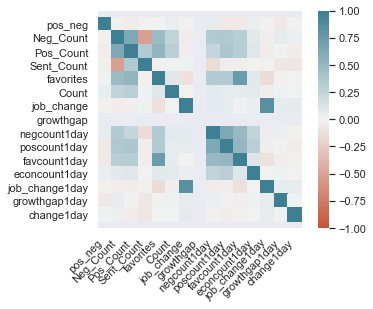

<Figure size 14400x14400 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [51]:
#Correlation Matrix plots
corr = trump_mmkt_hm.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
;
plt.figure(figsize=(200,200))
# Show plot
plt.show()

# Save Figure
plt.savefig("MCap_Correlation_Matrix.png", figsize=(400,240))